# Financial News Sentiment Analysis Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

In [ ]:
# Import all the required libraries
import nltk
import pandas as pd
import matplotlib.pyplot as plt

#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer


# Basic EDA on cnbc_headlines dataset

In [ ]:
# Read csv file of cnbc headlines using pandas
cnbc = pd.read_csv('/content/cnbc_headlines.csv')

In [ ]:
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [ ]:
# check the shape of cnbc headline dataset
cnbc.shape

(3080, 3)

In [ ]:
# Check all the columns in the cnbc headline dataset
cnbc.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [ ]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc.isna().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [ ]:
 # drop nan values in cnbc headline dataset
cnbc.dropna(inplace=True)

In [ ]:
cnbc.shape

(2800, 3)

In [ ]:
cnbc.duplicated().sum()

0

In [ ]:
# drop the duplicate rows in the dataset keep the first one
cnbc = cnbc.drop_duplicates(keep='first')

In [ ]:
# check the shape of cnbc headline dataset
cnbc.shape

(2800, 3)

# Basic EDA on Gaurdian headlines dataset

In [ ]:
# Read csv file of gaurdian headlines using pandas
guardian = pd.read_csv('/content/guardian_headlines.csv')

In [ ]:
guardian.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [ ]:
#check the shape of gaurdian headline dataset
guardian.shape

(17800, 2)

In [ ]:
#check columns of gaurdian headline
guardian.columns

Index(['Time', 'Headlines'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values
guardian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [ ]:
# check null values in gaurdian headlines dataset
guardian.isna().sum()

Time         0
Headlines    0
dtype: int64

In [ ]:
# drop duplicate rows in headlines and keep the first one
guardian= guardian.drop_duplicates(keep='first')

In [ ]:
guardian.shape

(17800, 2)

# Basic EDA on reuters headlines

In [ ]:
# Read csv file of reuters headlines using using pandas
reuter = pd.read_csv('/content/reuters_headlines.csv')

In [ ]:
reuter.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [ ]:
#check the shape of reuters headlines dataset
reuter.shape

(32770, 3)

In [ ]:
#check the columns of reuters headline dataset
reuter.shape

(32770, 3)

In [ ]:
# Check which columns are having categorical, numerical or boolean values
reuter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [ ]:
# Check for missing values in all the columnns of reuters headlines dataset
reuter.isna().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [ ]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuter = reuter.drop_duplicates(keep='first')

#Making some functions that we will need  ahead

Preprocessing

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# create a function for preprocessing
def preprocessing(text):

  #convert all to lowercase
  text = text.lower()

  #remove puntuations

  text = text.translate(str.maketrans('', '', string.punctuation))

  # punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  # for word in text:
  #   if word in punc:
  #     text = text.replace(word, '')

  #remove stopword

  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)

  filtered_sentence = [w for w in word_tokens if w not in stop_words]

  #stemming
  stemmed_sentence = []
  ps = PorterStemmer()
  for w in filtered_sentence:
    stemmed_sentence.append(ps.stem(w))


  #lemmitizing
  #lemmat_words = []
  lemmatizer = WordNetLemmatizer()

  lemmat_words = [lemmatizer.lemmatize(w) for w in stemmed_sentence]

  return " ".join(lemmat_words)



In [ ]:
preprocessing('''What is your name?, king kin My nam is Mahesh Reddy.''')

'name king kin nam mahesh reddi'

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.6 MB/s eta 0:00:00


In [ ]:
# import sentiment intensity analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# create sentiment intensity analyzer object

analyzer = SentimentIntensityAnalyzer()

In [ ]:
#fuction to  decide sentiment as positive, negative and neutral
def get_analysis(score):
  # decide sentiment as positive, negative and neutral
  if score < 0.0 :
    return 'Negative'

  elif score ==  0.0 :
    return 'Neutral'
  else :
    return "Positive"

# Now working with description on datasets

In [ ]:
# concatenate cnbc headlines dataset and reuters headline dataset
cnbc_reuter = pd.concat([cnbc,reuter], axis=0)
cnbc_reuter.reset_index(drop=True, inplace=True)

In [ ]:
#check the shape of this new dataset
cnbc_reuter.shape

(35515, 3)

In [ ]:
import copy
#make a copy of new dataset
cnbc_reuter_copy = copy.deepcopy(cnbc_reuter)

In [ ]:
print(cnbc_reuter_copy.shape)
cnbc_reuter_copy.head()

(35515, 3)


,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."


In [ ]:
%%time
# apply preprocessing to the description of new dataset

cnbc_reuter_copy['Description'] = cnbc_reuter_copy['Description'].apply(preprocessing)

CPU times: user 30.4 s, sys: 902 ms, total: 31.3 s
Wall time: 40.3 s


In [ ]:
cnbc_reuter_copy.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...


In [ ]:
# analyze polarity score of values in description and  add new column of it in dataset
ds_score = []
for value in cnbc_reuter_copy['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])

cnbc_reuter_copy['ds_score'] = ds_score
cnbc_reuter_copy.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,-0.6597


In [ ]:
# apply the function  which decides sentiment to  polarity score column

cnbc_reuter_copy['ds_score'] = cnbc_reuter_copy['ds_score'].apply(get_analysis)

In [ ]:
cnbc_reuter_copy.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative


Positive    15101
Negative    12266
Neutral      8148
Name: ds_score, dtype: int64


<Axes: xlabel='ds_score', ylabel='count'>

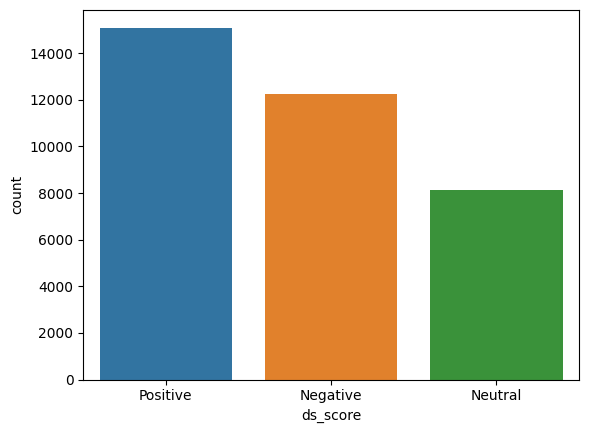

In [ ]:
import seaborn as sns
# plot a count plot on description score column
print(cnbc_reuter_copy['ds_score'].value_counts())
sns.countplot(x = 'ds_score', data=cnbc_reuter_copy)

In the description

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [ ]:
# pie chart on description score column
import plotly.express as px
fig = px.pie(cnbc_reuter_copy,
             names='ds_score')
fig.show()

In the dataset

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description

In [ ]:
cnbc_reuter_copy.head()

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go lower even thou...,Negative


In [ ]:
cnbc_reuter_copy['ds_score'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
#cnbc_reuter_copy['ds_score'] = cnbc_reuter_copy['ds_score'].replace({'Negative': 0, "Neutral" : 1, 'Positive':2}) #This is only required for xgboost
#cnbc_reuter_copy.head()

In [ ]:
X = cnbc_reuter_copy['Description']
y = cnbc_reuter_copy['ds_score']

In [ ]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=212)

In [ ]:
print(f'X_train:{x_train.shape}, X_test:{x_test.shape}')

X_train:(31963,), X_test:(3552,)


In [ ]:
x_train

17417    uber technolog inc report record 52 billion lo...
21994    french financ minist bruno le mair said thursd...
3538     deutsch bank lookout expans opportun area paym...
18186    qatariback lawyer task tri draw line deutsch b...
30694    u presid donald trump said wednesday hope work...
                               ...                        
28833    daimler appoint compani veteran ola kaelleniu ...
8222     gertrud chavezdreyfuss kate duguid abhinav ram...
20926    china huawei technolog co ltd tuesday launch t...
31970    hong kongshanghai reutersifr chine smartphon m...
28952    walmart inc said may hike price product trump ...
Name: Description, Length: 31963, dtype: object

LINEAR SUPPORT VECTOR MACHINE


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# Fit the pipeline to the data
linear_svc_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = linear_svc_model.predict(x_test)
print('Model - Linear SVC')
# print accuracy score
accuracy_lsvc = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model - Linear SVC
Accuracy score is 0.9304617117117117
[[1119   45   73]
 [  21  756   23]
 [  51   34 1430]]
              precision    recall  f1-score   support

    Negative       0.94      0.90      0.92      1237
     Neutral       0.91      0.94      0.92       800
    Positive       0.94      0.94      0.94      1515

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

CPU times: user 1.14 s, sys: 22.9 ms, total: 1.16 s
Wall time: 1.19 s


LOGISTIC REGRESSION


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. LogisticRegression

pipe = Pipeline([('tfidf', TfidfVectorizer()),    #('vect', CountVectorizer())
                  ('model', LogisticRegression())])

# Fit the pipeline to the data
logestic_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = logestic_model.predict(x_test)
print('Model - logestic regression')
# print accuracy score
accuracy_logestic = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model - logestic regression
Accuracy score is 0.8927364864864865
[[1053   77  107]
 [  36  727   37]
 [  72   52 1391]]
              precision    recall  f1-score   support

    Negative       0.91      0.85      0.88      1237
     Neutral       0.85      0.91      0.88       800
    Positive       0.91      0.92      0.91      1515

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552

CPU times: user 3.72 s, sys: 3.12 s, total: 6.85 s
Wall time: 5.04 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. multinomialNB

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', MultinomialNB())])

# Fit the pipeline to the data
multinomial_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = multinomial_model.predict(x_test)
print('Model -  multinomial_model')
# print accuracy score
accuracy_multinomial = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  multinomial_model
Accuracy score is 0.6399211711711712
[[ 806    8  423]
 [ 148   83  569]
 [ 127    4 1384]]
              precision    recall  f1-score   support

    Negative       0.75      0.65      0.70      1237
     Neutral       0.87      0.10      0.19       800
    Positive       0.58      0.91      0.71      1515

    accuracy                           0.64      3552
   macro avg       0.73      0.56      0.53      3552
weighted avg       0.70      0.64      0.59      3552

CPU times: user 1.14 s, sys: 4.95 ms, total: 1.15 s
Wall time: 1.27 s


BERNOULLI NAIVE BAYES


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. BERNOULLINB

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', BernoulliNB())])

# Fit the pipeline to the data
BernoulliNB_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = BernoulliNB_model.predict(x_test)
print('Model -  BernoulliNB_model')
# print accuracy score
accuracy_bernoulli = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  BernoulliNB_model
Accuracy score is 0.7381756756756757
[[ 919   56  262]
 [ 136  471  193]
 [ 211   72 1232]]
              precision    recall  f1-score   support

    Negative       0.73      0.74      0.73      1237
     Neutral       0.79      0.59      0.67       800
    Positive       0.73      0.81      0.77      1515

    accuracy                           0.74      3552
   macro avg       0.75      0.71      0.73      3552
weighted avg       0.74      0.74      0.74      3552

CPU times: user 1.14 s, sys: 4.36 ms, total: 1.15 s
Wall time: 1.44 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. GradientBoostingClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', GradientBoostingClassifier(loss='deviance',
                                              learning_rate=0.01,
                                              n_estimators=10,
                                              max_depth = 5,
                                              random_state=55))])

# Fit the pipeline to the data
GradientBoostingClassifier_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = GradientBoostingClassifier_model.predict(x_test)
print('Model -  GradientBoostingClassifier_model')
# print accuracy score
accuracy_GradientBoostingClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



Model -  GradientBoostingClassifier_model
Accuracy score is 0.42680180180180183
[[   4    0 1233]
 [   0    0  800]
 [   3    0 1512]]
              precision    recall  f1-score   support

    Negative       0.57      0.00      0.01      1237
     Neutral       0.00      0.00      0.00       800
    Positive       0.43      1.00      0.60      1515

    accuracy                           0.43      3552
   macro avg       0.33      0.33      0.20      3552
weighted avg       0.38      0.43      0.26      3552

CPU times: user 15.3 s, sys: 34.9 ms, total: 15.3 s
Wall time: 20.7 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
# %%time  #XGB Classifier expects numarical data in y_train
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# # pipeline creation
# # 1. tfidVectorization
# # 2. xgboost


# pipe = Pipeline([
#                   ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
#                   ('model', XGBClassifier())])

# # Fit the pipeline to the data
# XGBClassifier_model = pipe.fit(x_train, y_train)
# # predict on test dataset
# prediction = XGBClassifier_model.predict(x_test)
# print('Model -  XGBClassifier_model')
# # print accuracy score
# accuracy_XGBClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
# #print confusion matrix
# print(confusion_matrix(y_test, prediction))
# #print classification report
# print(classification_report(y_test, prediction))

DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. DecisionTreeClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', DecisionTreeClassifier())])

# Fit the pipeline to the data
DecisionTreeClassifier_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = DecisionTreeClassifier_model.predict(x_test)
print('Model -  DecisionTreeClassifier_model')
# print accuracy score
accuracy_DecisionTreeClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  DecisionTreeClassifier_model
Accuracy score is 0.8735923423423423
[[1002   19  216]
 [  11  779   10]
 [ 180   13 1322]]
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.82      1237
     Neutral       0.96      0.97      0.97       800
    Positive       0.85      0.87      0.86      1515

    accuracy                           0.87      3552
   macro avg       0.88      0.89      0.88      3552
weighted avg       0.87      0.87      0.87      3552

CPU times: user 16.9 s, sys: 12 ms, total: 16.9 s
Wall time: 16.9 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. KNeighborsClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', KNeighborsClassifier())])

# Fit the pipeline to the data
KNeighborsClassifier_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = KNeighborsClassifier_model.predict(x_test)
print('Model -  KNeighborsClassifier_model')
# print accuracy score
accuracy_KNeighborsClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  KNeighborsClassifier_model
Accuracy score is 0.5523648648648649
[[815 170 252]
 [254 292 254]
 [395 265 855]]
              precision    recall  f1-score   support

    Negative       0.56      0.66      0.60      1237
     Neutral       0.40      0.36      0.38       800
    Positive       0.63      0.56      0.59      1515

    accuracy                           0.55      3552
   macro avg       0.53      0.53      0.53      3552
weighted avg       0.55      0.55      0.55      3552

CPU times: user 1min 22s, sys: 55.7 ms, total: 1min 22s
Wall time: 45 s


In [ ]:
# helper function for comparing models matric
def comparing_models(models, names, x_train, y_train, x_test, y_test):

    # the libraries we need
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for model, name in zip(models, names):
      print(name)
      # then predict on the test set
      y_pred = model.predict(x_test)
      print(accuracy_score(y_test, y_pred))
      res = classification_report(y_test, y_pred)
      print('Classification report:', res)
      print(2*'---')


In [ ]:
# list of model objects
models = [linear_svc_model, logestic_model, multinomial_model, BernoulliNB_model, GradientBoostingClassifier_model, DecisionTreeClassifier_model, KNeighborsClassifier_model]
# list of model names
names = ['linear_svc', 'logestic_model', 'multinomial_NB', 'BernoulliNB', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier']
# print the comparison of models
comparing_models(models, names, x_train, y_train, x_test, y_test)

linear_svc
0.9304617117117117
Classification report:               precision    recall  f1-score   support

    Negative       0.94      0.90      0.92      1237
     Neutral       0.91      0.94      0.92       800
    Positive       0.94      0.94      0.94      1515

    accuracy                           0.93      3552
   macro avg       0.93      0.93      0.93      3552
weighted avg       0.93      0.93      0.93      3552

------
logestic_model
0.8927364864864865
Classification report:               precision    recall  f1-score   support

    Negative       0.91      0.85      0.88      1237
     Neutral       0.85      0.91      0.88       800
    Positive       0.91      0.92      0.91      1515

    accuracy                           0.89      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.89      0.89      0.89      3552

------
multinomial_NB
0.6399211711711712
Classification report:               precision    recall  f1-score   support

  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report:               precision    recall  f1-score   support

    Negative       0.57      0.00      0.01      1237
     Neutral       0.00      0.00      0.00       800
    Positive       0.43      1.00      0.60      1515

    accuracy                           0.43      3552
   macro avg       0.33      0.33      0.20      3552
weighted avg       0.38      0.43      0.26      3552

------
DecisionTreeClassifier
0.8735923423423423
Classification report:               precision    recall  f1-score   support

    Negative       0.84      0.81      0.82      1237
     Neutral       0.96      0.97      0.97       800
    Positive       0.85      0.87      0.86      1515

    accuracy                           0.87      3552
   macro avg       0.88      0.89      0.88      3552
weighted avg       0.87      0.87      0.87      3552

------
KNeighborsClassifier
0.5523648648648649
Classification report:               precision    recall  f1-score   support

    Negative      

# working with test dataset

In [ ]:
# Perforn the prediction on the test dataset
y_pred = linear_svc_model.predict(x_test)
y_pred

array(['Negative', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_pred)
predictions

,0
0,Negative
1,Positive
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# Now working with headlines + description

In [ ]:
cnbc_reuter_copy.head(2)

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative


In [ ]:
# merge headlines and description of new dataset and name it info
cnbc_reuter_copy['info'] = cnbc_reuter_copy['Headlines'] + cnbc_reuter_copy['Description']
cnbc_reuter_copy.head(2)

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...


In [ ]:
# only keep info and time column . drop all remaining columns
cnbc_reuter_copy_new = cnbc_reuter_copy.drop(columns=['Headlines', 'Description', 'ds_score'], axis=1)
cnbc_reuter_copy_new.head(2)

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...


In [ ]:
# apply preprocessing on info column
cnbc_reuter_copy_new['info'] = cnbc_reuter_copy_new['info'].apply(preprocessing)

In [ ]:
cnbc_reuter_copy_new.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...


In [ ]:
# analyze polarity score of values in info and  add new column of it in dataset

score = []
for value in cnbc_reuter_copy_new['info'].values:
  score.append(analyzer.polarity_scores(value)['compound'])

cnbc_reuter_copy_new['info_score'] = score
cnbc_reuter_copy_new.head()

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2500


In [ ]:
# apply the function  which decides sentiment to  polarity score column
cnbc_reuter_copy_new['info_score'] = cnbc_reuter_copy_new['info_score'].apply(get_analysis)
cnbc_reuter_copy_new.head()

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer better way invest covid19 vaccin go...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even bigger we...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative


<Axes: xlabel='info_score', ylabel='count'>

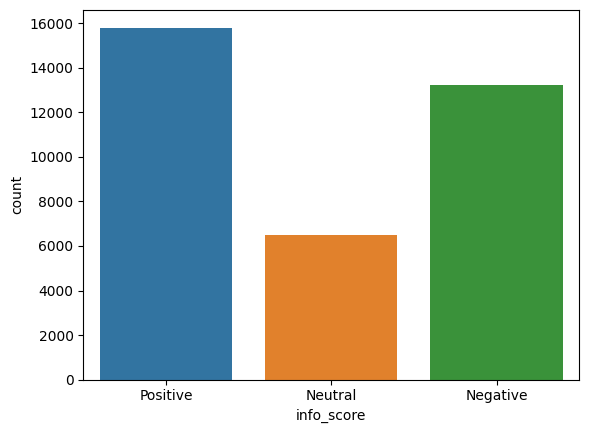

In [ ]:
# perform count plot on info_score column
sns.countplot(data = cnbc_reuter_copy_new, x='info_score')

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

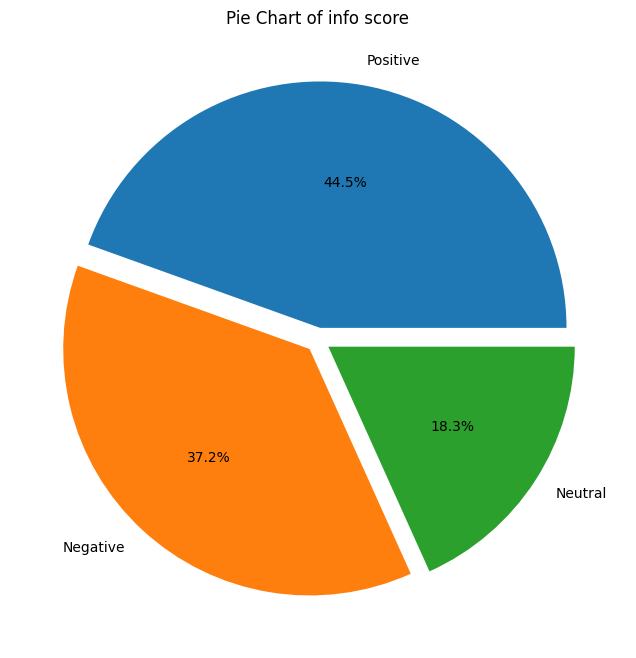

In [ ]:
# perform pie chart on info_score column
import matplotlib.pyplot as plt

# Get value counts for the 'column_name' column
value_counts = cnbc_reuter_copy_new['info_score'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
value_counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05]*len(value_counts))
plt.title('Pie Chart of info score')

plt.ylabel('')  # To remove the default 'column_name' label on the y-axis
plt.show()


In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [ ]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212
x_train, x_test, y_train, y_test = train_test_split(cnbc_reuter_copy_new['info'], cnbc_reuter_copy_new['info_score'], test_size=0.1, random_state=212)
print(f'x_train {x_train.shape}, x_test {x_test.shape}')

x_train (31963,), x_test (3552,)


LINEAR SUPPORT VECTOR MACHINE


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# Fit the pipeline to the data
linear_svc_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = linear_svc_model.predict(x_test)
print('Model - Linear SVC')
# print accuracy score
accuracy_lsvc = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))


Model - Linear SVC
Accuracy score is 0.9009009009009009
[[1183   49   83]
 [  41  538   56]
 [  72   51 1479]]
              precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1315
     Neutral       0.84      0.85      0.85       635
    Positive       0.91      0.92      0.92      1602

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552

CPU times: user 1.35 s, sys: 32.9 ms, total: 1.39 s
Wall time: 1.37 s


LOGISTIC REGRESSION


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. LogisticRegression

pipe = Pipeline([('tfidf', TfidfVectorizer()),    #('vect', CountVectorizer())
                  ('model', LogisticRegression())])

# Fit the pipeline to the data
logestic_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = logestic_model.predict(x_test)
print('Model - logestic regression')
# print accuracy score
accuracy_logestic = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model - logestic regression
Accuracy score is 0.8626126126126126
[[1134   58  123]
 [  73  467   95]
 [  94   45 1463]]
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      1315
     Neutral       0.82      0.74      0.78       635
    Positive       0.87      0.91      0.89      1602

    accuracy                           0.86      3552
   macro avg       0.85      0.84      0.84      3552
weighted avg       0.86      0.86      0.86      3552

CPU times: user 5.61 s, sys: 4.87 s, total: 10.5 s
Wall time: 6.82 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. multinomialNB

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', MultinomialNB())])

# Fit the pipeline to the data
multinomial_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = multinomial_model.predict(x_test)
print('Model -  multinomial_model')
# print accuracy score
accuracy_multinomial = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  multinomial_model
Accuracy score is 0.6444256756756757
[[ 826    0  489]
 [ 131   11  493]
 [ 148    2 1452]]
              precision    recall  f1-score   support

    Negative       0.75      0.63      0.68      1315
     Neutral       0.85      0.02      0.03       635
    Positive       0.60      0.91      0.72      1602

    accuracy                           0.64      3552
   macro avg       0.73      0.52      0.48      3552
weighted avg       0.70      0.64      0.58      3552

CPU times: user 934 ms, sys: 14 ms, total: 948 ms
Wall time: 951 ms


BERNOULLI NAIVE BAYES


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. BERNOULLINB

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', BernoulliNB())])

# Fit the pipeline to the data
BernoulliNB_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = BernoulliNB_model.predict(x_test)
print('Model -  BernoulliNB_model')
# print accuracy score
accuracy_bernoulli = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  BernoulliNB_model
Accuracy score is 0.6880630630630631
[[ 972   12  331]
 [ 177  139  319]
 [ 248   21 1333]]
              precision    recall  f1-score   support

    Negative       0.70      0.74      0.72      1315
     Neutral       0.81      0.22      0.34       635
    Positive       0.67      0.83      0.74      1602

    accuracy                           0.69      3552
   macro avg       0.73      0.60      0.60      3552
weighted avg       0.71      0.69      0.66      3552

CPU times: user 868 ms, sys: 4.97 ms, total: 873 ms
Wall time: 876 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. GradientBoostingClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', GradientBoostingClassifier(loss='deviance',
                                              learning_rate=0.01,
                                              n_estimators=10,
                                              max_depth = 5,
                                              random_state=55))])

# Fit the pipeline to the data
GradientBoostingClassifier_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = GradientBoostingClassifier_model.predict(x_test)
print('Model -  GradientBoostingClassifier_model')
# print accuracy score
accuracy_GradientBoostingClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



Model -  GradientBoostingClassifier_model
Accuracy score is 0.45213963963963966
[[   8    0 1307]
 [   0    0  635]
 [   4    0 1598]]
              precision    recall  f1-score   support

    Negative       0.67      0.01      0.01      1315
     Neutral       0.00      0.00      0.00       635
    Positive       0.45      1.00      0.62      1602

    accuracy                           0.45      3552
   macro avg       0.37      0.33      0.21      3552
weighted avg       0.45      0.45      0.28      3552

CPU times: user 15.2 s, sys: 23.7 ms, total: 15.3 s
Wall time: 15.2 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
# %%time
# #XGB Classifier expects numarical data in y_train
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# # pipeline creation
# # 1. tfidVectorization
# # 2. xgboost


# pipe = Pipeline([
#                   ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
#                   ('model', XGBClassifier())])

# # Fit the pipeline to the data
# XGBClassifier_model = pipe.fit(x_train, y_train)
# # predict on test dataset
# prediction = XGBClassifier_model.predict(x_test)
# print('Model -  XGBClassifier_model')
# # print accuracy score
# accuracy_XGBClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
# #print confusion matrix
# print(confusion_matrix(y_test, prediction))
# #print classification report
# print(classification_report(y_test, prediction))

DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. DecisionTreeClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', DecisionTreeClassifier())])

# Fit the pipeline to the data
DecisionTreeClassifier_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = DecisionTreeClassifier_model.predict(x_test)
print('Model -  DecisionTreeClassifier_model')
# print accuracy score
accuracy_DecisionTreeClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  DecisionTreeClassifier_model
Accuracy score is 0.8414977477477478
[[1039   30  246]
 [  12  615    8]
 [ 242   25 1335]]
              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80      1315
     Neutral       0.92      0.97      0.94       635
    Positive       0.84      0.83      0.84      1602

    accuracy                           0.84      3552
   macro avg       0.85      0.86      0.86      3552
weighted avg       0.84      0.84      0.84      3552

CPU times: user 18.6 s, sys: 29.9 ms, total: 18.7 s
Wall time: 18.7 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. KNeighborsClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', KNeighborsClassifier())])

# Fit the pipeline to the data
KNeighborsClassifier_model = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = KNeighborsClassifier_model.predict(x_test)
print('Model -  KNeighborsClassifier_model')
# print accuracy score
accuracy_KNeighborsClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  KNeighborsClassifier_model
Accuracy score is 0.567286036036036
[[887 118 310]
 [220 185 230]
 [456 203 943]]
              precision    recall  f1-score   support

    Negative       0.57      0.67      0.62      1315
     Neutral       0.37      0.29      0.32       635
    Positive       0.64      0.59      0.61      1602

    accuracy                           0.57      3552
   macro avg       0.52      0.52      0.52      3552
weighted avg       0.56      0.57      0.56      3552

CPU times: user 1min 46s, sys: 71.7 ms, total: 1min 46s
Wall time: 59 s


In [ ]:
# helper function for comparing models matric
def comparing_models(models, names, x_train, y_train, x_test, y_test):

    # the libraries we need
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for model, name in zip(models, names):
      print(name)
      # then predict on the test set
      y_pred = model.predict(x_test)
      print(accuracy_score(y_test, y_pred))
      res = classification_report(y_test, y_pred)
      print('Classification report:', res)
      print(25*'---')


In [ ]:
# list of model objects
models = [linear_svc_model, logestic_model, multinomial_model, BernoulliNB_model, GradientBoostingClassifier_model, DecisionTreeClassifier_model, KNeighborsClassifier_model]
# list of model names
names = ['linear_svc', 'logestic_model', 'multinomial_NB', 'BernoulliNB', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier']
# print the comparison of models
comparing_models(models, names, x_train, y_train, x_test, y_test)


linear_svc
0.9009009009009009
Classification report:               precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      1315
     Neutral       0.84      0.85      0.85       635
    Positive       0.91      0.92      0.92      1602

    accuracy                           0.90      3552
   macro avg       0.89      0.89      0.89      3552
weighted avg       0.90      0.90      0.90      3552

---------------------------------------------------------------------------
logestic_model
0.8626126126126126
Classification report:               precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      1315
     Neutral       0.82      0.74      0.78       635
    Positive       0.87      0.91      0.89      1602

    accuracy                           0.86      3552
   macro avg       0.85      0.84      0.84      3552
weighted avg       0.86      0.86      0.86      3552

----------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.567286036036036
Classification report:               precision    recall  f1-score   support

    Negative       0.57      0.67      0.62      1315
     Neutral       0.37      0.29      0.32       635
    Positive       0.64      0.59      0.61      1602

    accuracy                           0.57      3552
   macro avg       0.52      0.52      0.52      3552
weighted avg       0.56      0.57      0.56      3552

---------------------------------------------------------------------------


# working with test data

In [ ]:
# Perforn the prediction on the test dataset
predcition = linear_svc_model.predict(x_test)

In [ ]:
# creating a dataframe of predicted results
predicted_result = pd.DataFrame(predcition)
predicted_result

,0
0,Negative
1,Negative
2,Positive
3,Positive
4,Negative
...,...
3547,Negative
3548,Positive
3549,Positive
3550,Positive


# now working on headlines

In [ ]:
cnbc_reuter_copy.head(2)

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...


In [ ]:
# from the dataset you have copied before delete the column of description
cnbc_reuter_copy_head = cnbc_reuter_copy.drop(columns=['Description', 'ds_score','info'], axis=1)
print(cnbc_reuter_copy_head.shape)
cnbc_reuter_copy_head.head(2)

(35515, 2)


,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"


In [ ]:
# remane the date column in gaurdian headlines dataset  to time
guardian_headlines = pd.read_csv('/content/guardian_headlines.csv')
guardian_headlines.head()
print(guardian_headlines.shape)

(17800, 2)


In [ ]:
# cancatenate the gaurdian headlines dataset and  copy of datasetto get all headlines together
cnbc_reuter_guardian = pd.concat([cnbc_reuter_copy_head, guardian_headlines], ignore_index=True)

In [ ]:
# check the shape of all headlines dataset
print(cnbc_reuter_guardian.shape)
cnbc_reuter_guardian.tail()

(53315, 2)


,Headlines,Time
53310,How investing in solar energy can create a bri...,17-Dec-17
53311,Poundland suppliers hit by insurance downgrade,17-Dec-17
53312,Cryptocurrencies: City watchdog to investigate...,17-Dec-17
53313,Unilever sells household name spreads to KKR f...,17-Dec-17
53314,The Guardian view on Ryanair’s model: a union-...,17-Dec-17


In [ ]:
#apply preprocessin to the headlines column in the new dataset
cnbc_reuter_guardian['Headlines'] = cnbc_reuter_guardian['Headlines'].apply(preprocessing)
cnbc_reuter_guardian.tail()

,Headlines,Time
53310,invest solar energi creat brighter futur africa,17-Dec-17
53311,poundland supplier hit insur downgrad,17-Dec-17
53312,cryptocurr citi watchdog investig new fundrais...,17-Dec-17
53313,unilev sell household name spread kkr £6bn,17-Dec-17
53314,guardian view ryanair ’ model unionfriendli co...,17-Dec-17


In [ ]:
# analyze polarity score of values in headlines and  add new column of it in dataset

score = []
for value in cnbc_reuter_guardian['Headlines'].values:
  score.append(analyzer.polarity_scores(value)['compound'])

cnbc_reuter_guardian['headline_score'] = score
cnbc_reuter_guardian.tail()


,Headlines,Time,headline_score
53310,invest solar energi creat brighter futur africa,17-Dec-17,0.3818
53311,poundland supplier hit insur downgrad,17-Dec-17,0.0000
53312,cryptocurr citi watchdog investig new fundrais...,17-Dec-17,0.0000
53313,unilev sell household name spread kkr £6bn,17-Dec-17,0.0000
53314,guardian view ryanair ’ model unionfriendli co...,17-Dec-17,0.0000


In [ ]:
# apply the function  which decides sentiment to  polarity score column
cnbc_reuter_guardian['headline_score'] = cnbc_reuter_guardian['headline_score'].apply(get_analysis)
cnbc_reuter_guardian.tail()

,Headlines,Time,headline_score
53310,invest solar energi creat brighter futur africa,17-Dec-17,Positive
53311,poundland supplier hit insur downgrad,17-Dec-17,Neutral
53312,cryptocurr citi watchdog investig new fundrais...,17-Dec-17,Neutral
53313,unilev sell household name spread kkr £6bn,17-Dec-17,Neutral
53314,guardian view ryanair ’ model unionfriendli co...,17-Dec-17,Neutral


In [ ]:
#perform countplot on headline score column
value_counts = cnbc_reuter_guardian.headline_score.value_counts()
print(value_counts)


Neutral     23959
Negative    16107
Positive    13249
Name: headline_score, dtype: int64


In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

<Axes: ylabel='headline_score'>

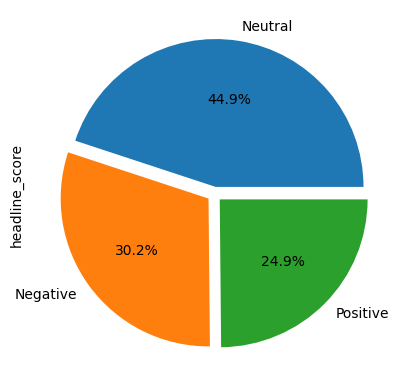

In [ ]:
#perform pie digram on headline score column

#plt.pie(value_counts, labels=value_counts.unique())
value_counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05]*len(value_counts))

In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [ ]:
cnbc_reuter_guardian.head()

,Headlines,Time,headline_score
0,jim cramer better way invest covid19 vaccin go...,"7:51 PM ET Fri, 17 July 2020",Positive
1,cramer lightn round would teradyn,"7:33 PM ET Fri, 17 July 2020",Neutral
2,cramer week ahead big week earn even bigger we...,"7:25 PM ET Fri, 17 July 2020",Neutral
3,iq capit ceo keith bliss say tech healthcar ralli,"4:24 PM ET Fri, 17 July 2020",Positive
4,wall street deliv kind pullback ive wait jim c...,"7:36 PM ET Thu, 16 July 2020",Positive


In [ ]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212

x_train, x_test, y_train,y_test = train_test_split(cnbc_reuter_guardian['Headlines'], cnbc_reuter_guardian['headline_score'], test_size=0.1, random_state=121)
print(f'x_train:{x_train.shape}, x_test:{x_test.shape}')

x_train:(47983,), x_test:(5332,)


LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

# Fit the pipeline to the data
linear_svc_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = linear_svc_model_headline.predict(x_test)
print('Model - Linear SVC')
# print accuracy score
accuracy_lsvc = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))


Model - Linear SVC
Accuracy score is 0.9728057014253564
[[1593   31   43]
 [  10 2382    5]
 [  39   17 1212]]
              precision    recall  f1-score   support

    Negative       0.97      0.96      0.96      1667
     Neutral       0.98      0.99      0.99      2397
    Positive       0.96      0.96      0.96      1268

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332

CPU times: user 1.25 s, sys: 7.95 ms, total: 1.25 s
Wall time: 1.28 s


LOGISTIC REGRESSION

In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. LogisticRegression

pipe = Pipeline([('tfidf', TfidfVectorizer()),    #('vect', CountVectorizer())
                  ('model', LogisticRegression())])

# Fit the pipeline to the data
logestic_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = logestic_model_headline.predict(x_test)
print('Model - logestic regression')
# print accuracy score
accuracy_logestic = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model - logestic regression
Accuracy score is 0.9414853713428357
[[1501  113   53]
 [   8 2382    7]
 [  48   83 1137]]
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1667
     Neutral       0.92      0.99      0.96      2397
    Positive       0.95      0.90      0.92      1268

    accuracy                           0.94      5332
   macro avg       0.95      0.93      0.94      5332
weighted avg       0.94      0.94      0.94      5332

CPU times: user 3.3 s, sys: 3.22 s, total: 6.53 s
Wall time: 3.73 s


MULTINOMIAL NAIVE BAYES


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. multinomialNB

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', MultinomialNB())])

# Fit the pipeline to the data
multinomial_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = multinomial_model_headline.predict(x_test)
print('Model -  multinomial_model')
# print accuracy score
accuracy_multinomial = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  multinomial_model
Accuracy score is 0.8621530382595649
[[1431  187   49]
 [  56 2323   18]
 [ 193  232  843]]
              precision    recall  f1-score   support

    Negative       0.85      0.86      0.86      1667
     Neutral       0.85      0.97      0.90      2397
    Positive       0.93      0.66      0.77      1268

    accuracy                           0.86      5332
   macro avg       0.88      0.83      0.84      5332
weighted avg       0.87      0.86      0.86      5332

CPU times: user 597 ms, sys: 3.11 ms, total: 600 ms
Wall time: 600 ms


BERNOULLI NAIVE BAYES


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. BERNOULLINB

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', BernoulliNB())])

# Fit the pipeline to the data
BernoulliNB_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = BernoulliNB_model_headline.predict(x_test)
print('Model -  BernoulliNB_model')
# print accuracy score
accuracy_bernoulli = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  BernoulliNB_model
Accuracy score is 0.8987246811702926
[[1520   57   90]
 [ 116 2201   80]
 [ 155   42 1071]]
              precision    recall  f1-score   support

    Negative       0.85      0.91      0.88      1667
     Neutral       0.96      0.92      0.94      2397
    Positive       0.86      0.84      0.85      1268

    accuracy                           0.90      5332
   macro avg       0.89      0.89      0.89      5332
weighted avg       0.90      0.90      0.90      5332

CPU times: user 597 ms, sys: 4.07 ms, total: 601 ms
Wall time: 602 ms


GRADIENT BOOSTING CLASSIFICATION MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. GradientBoostingClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', GradientBoostingClassifier(loss='deviance',
                                              learning_rate=0.01,
                                              n_estimators=10,
                                              max_depth = 5,
                                              random_state=55))])

# Fit the pipeline to the data
GradientBoostingClassifier_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = GradientBoostingClassifier_model_headline.predict(x_test)
print('Model -  GradientBoostingClassifier_model')
# print accuracy score
accuracy_GradientBoostingClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



Model -  GradientBoostingClassifier_model
Accuracy score is 0.44954988747186797
[[   0 1667    0]
 [   0 2397    0]
 [   0 1268    0]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1667
     Neutral       0.45      1.00      0.62      2397
    Positive       0.00      0.00      0.00      1268

    accuracy                           0.45      5332
   macro avg       0.15      0.33      0.21      5332
weighted avg       0.20      0.45      0.28      5332

CPU times: user 7.38 s, sys: 11.2 ms, total: 7.39 s
Wall time: 7.43 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the model to the data


# predict on test data


#print accuracy

#print confusion matrix

# print classification report


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


DECISION TREE CLASSIFICATION MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. DecisionTreeClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', DecisionTreeClassifier())])

# Fit the pipeline to the data
DecisionTreeClassifier_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = DecisionTreeClassifier_model_headline.predict(x_test)
print('Model -  DecisionTreeClassifier_model')
# print accuracy score
accuracy_DecisionTreeClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  DecisionTreeClassifier_model
Accuracy score is 0.9551762940735183
[[1533   17  117]
 [   6 2384    7]
 [  84    8 1176]]
              precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      1667
     Neutral       0.99      0.99      0.99      2397
    Positive       0.90      0.93      0.92      1268

    accuracy                           0.96      5332
   macro avg       0.95      0.95      0.95      5332
weighted avg       0.96      0.96      0.96      5332

CPU times: user 16.6 s, sys: 13 ms, total: 16.6 s
Wall time: 16.6 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [ ]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pipeline creation
# 1. tfidVectorization
# 2. KNeighborsClassifier

pipe = Pipeline([
                  ('tfidf', TfidfVectorizer()),   #('vect', CountVectorizer())
                  ('model', KNeighborsClassifier())])

# Fit the pipeline to the data
KNeighborsClassifier_model_headline = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = KNeighborsClassifier_model_headline.predict(x_test)
print('Model -  KNeighborsClassifier_model')
# print accuracy score
accuracy_KNeighborsClassifier_model = print('Accuracy score is {}'.format(accuracy_score(y_test, prediction)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))

Model -  KNeighborsClassifier_model
Accuracy score is 0.6140285071267817
[[1027  533  107]
 [ 499 1728  170]
 [ 282  467  519]]
              precision    recall  f1-score   support

    Negative       0.57      0.62      0.59      1667
     Neutral       0.63      0.72      0.67      2397
    Positive       0.65      0.41      0.50      1268

    accuracy                           0.61      5332
   macro avg       0.62      0.58      0.59      5332
weighted avg       0.62      0.61      0.61      5332

CPU times: user 26.8 s, sys: 22.8 ms, total: 26.9 s
Wall time: 15.2 s


In [ ]:
# helper function for comparing models matric
def comparing_models(models, names, x_train, y_train, x_test, y_test):

    # the libraries we need
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.model_selection import train_test_split

    # create a dataframe with column matric and metric name as value
    for model, name in zip(models, names):
      print(name)
      # then predict on the test set
      y_pred = model.predict(x_test)
      print(accuracy_score(y_test, y_pred))
      res = classification_report(y_test, y_pred)
      print('Classification report:', res)
      print(25*'---')


In [ ]:
# list of model objects
models = [linear_svc_model_headline, logestic_model_headline, multinomial_model_headline, BernoulliNB_model_headline, GradientBoostingClassifier_model_headline, DecisionTreeClassifier_model_headline, KNeighborsClassifier_model_headline]
# list of model names
names = ['linear_svc', 'logestic_model', 'multinomial_NB', 'BernoulliNB', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier']
# print the comparison of models
comparing_models(models, names, x_train, y_train, x_test, y_test)


linear_svc
0.9728057014253564
Classification report:               precision    recall  f1-score   support

    Negative       0.97      0.96      0.96      1667
     Neutral       0.98      0.99      0.99      2397
    Positive       0.96      0.96      0.96      1268

    accuracy                           0.97      5332
   macro avg       0.97      0.97      0.97      5332
weighted avg       0.97      0.97      0.97      5332

---------------------------------------------------------------------------
logestic_model
0.9414853713428357
Classification report:               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1667
     Neutral       0.92      0.99      0.96      2397
    Positive       0.95      0.90      0.92      1268

    accuracy                           0.94      5332
   macro avg       0.95      0.93      0.94      5332
weighted avg       0.94      0.94      0.94      5332

----------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.9551762940735183
Classification report:               precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      1667
     Neutral       0.99      0.99      0.99      2397
    Positive       0.90      0.93      0.92      1268

    accuracy                           0.96      5332
   macro avg       0.95      0.95      0.95      5332
weighted avg       0.96      0.96      0.96      5332

---------------------------------------------------------------------------
KNeighborsClassifier
0.6140285071267817
Classification report:               precision    recall  f1-score   support

    Negative       0.57      0.62      0.59      1667
     Neutral       0.63      0.72      0.67      2397
    Positive       0.65      0.41      0.50      1268

    accuracy                           0.61      5332
   macro avg       0.62      0.58      0.59      5332
weighted avg       0.62      0.61      0.61      5332

---------------------------------------------------------

# now working with test data

In [ ]:
# Perforn the prediction on the test dataset
prediction = linear_svc_model_headline.predict(x_test)

In [ ]:
# creating a dataframe of predicted results
predicted_results = pd.DataFrame(prediction)
predicted_results

,0
0,Neutral
1,Neutral
2,Neutral
3,Neutral
4,Negative
...,...
5327,Neutral
5328,Negative
5329,Negative
5330,Negative


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more

In [ ]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_headline.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [ ]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_headline.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Save and load Final model using pickle

In [ ]:
import pickle
with open('Finanial_news_headline.pkl', 'wb') as f:
    pickle.dump(linear_svc_model_headline, f)


In [ ]:
# Load the model from the file
with open('/content/Finanial_news_headline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
loaded_model.predict(["Rajagopal From Tamil Nadu Receives His PhD at the Age of 70."])

array(['Neutral'], dtype=object)

# Save and load final model using joblib

In [ ]:
import joblib
# Save the model to a file
joblib.dump(linear_svc_model_headline, 'model_filename.joblib')

# Load the model from the file
loaded_model = joblib.load('model_filename.joblib')
loaded_model.predict(sent2)

array(['Positive'], dtype=object)

In [ ]:
def real_news(text):
  text = [text]
  loaded_model = joblib.load('model_filename.joblib')
  res = loaded_model.predict(text)
  return res

In [ ]:
real_news("Scotland Becomes the World's First Country to Provide Free Menstrual Products.")

array(['Positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this assigment.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate
